# Problem Definition
   Predicting Diabetes whether patients having "Diabetes" or "No Diabetes" using the Machine Learning Model-"Logistic Regression".
   where Logistic Regression Model is a binary classification model for outputs like "0" or "1" where "0" indicates "Patient having Diabetes"    and "1" indicates "Patient having No Diabetes".

# Data Collection

 Dataset is collected from kaggle website and it contains patient records of having "Diabetes" and "No Diabetes".

In [26]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset
db = pd.read_csv(r'C:\Users\Reshma\OneDrive\Documents\diabetes\diabetes.csv')


# Data Preprocessing
   

1.Explore the Data

In [27]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [28]:
db.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [29]:
db.shape

(768, 9)

In [30]:
db.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: xlabel='Outcome', ylabel='count'>

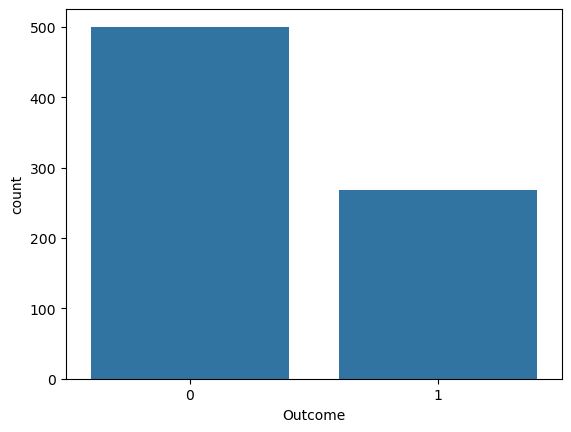

In [31]:
sns.countplot(x='Outcome',data=db)

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

<Axes: >

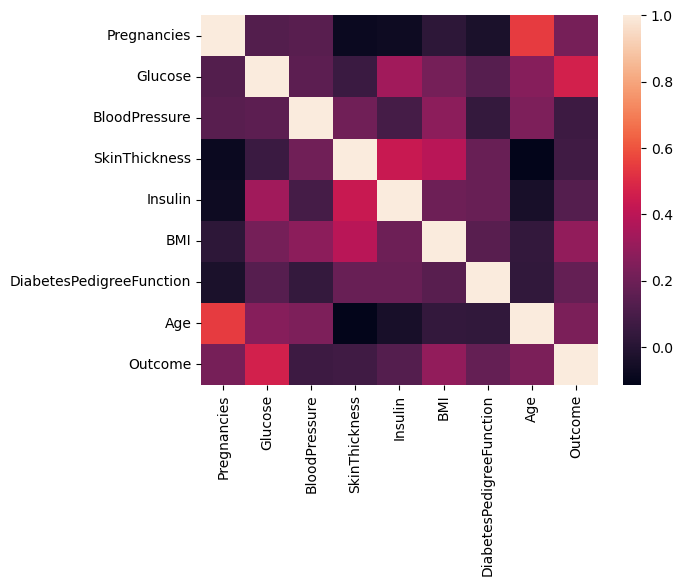

In [32]:
corr = db.corr()
print(corr)
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns)

2.Handle Missing Values

In [33]:
# Check for missing values
missing_values = db.isnull().sum()
print("Missing values in each column:")
print(missing_values)

# To get a total count of missing values
total_missing = missing_values.sum()
print(f"\nTotal missing values in the DataFrame: {total_missing}")


Missing values in each column:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Total missing values in the DataFrame: 0


3. Check for Duplicates

In [34]:
# Check for duplicate values
duplicates = db.duplicated().sum()
print(f"Total duplicate rows in the DataFrame: {duplicates}")

# If you want to see the actual duplicate rows
duplicate_rows = db[db.duplicated()]
print("\nDuplicate rows:")
print(duplicate_rows)


Total duplicate rows in the DataFrame: 0

Duplicate rows:
Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []


Since there are no missing values or duplicate records in the dataset, we can proceed to the next step: data splitting.

# Data Splitting

In [35]:
# Define feature columns and target variable
feature_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
x = db[feature_cols]  # Features
y = db['Outcome']     # Target variable

# Split the data into training and testing sets (80% training, 20% testing)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

# Print the shape of training and testing sets
print("Size of x_train is ", x_train.shape)
print("Size of y_train is ", y_train.shape)
print("Size of x_test is ", x_test.shape)
print("Size of y_test is ", y_test.shape)

Size of x_train is  (614, 8)
Size of y_train is  (614,)
Size of x_test is  (154, 8)
Size of y_test is  (154,)


In [36]:
# Apply feature scaling using StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Model Selection

In [37]:
# Initialize Logistic Regression model
LRClassifier = LogisticRegression(random_state=0)


# Model Training

In [39]:
# Train the model
LRClassifier.fit(x_train_scaled, y_train)


LogisticRegression(random_state=0)

# Model Evaluation

In [40]:
# Make predictions on the test set
prediction = LRClassifier.predict(x_test_scaled)


In [41]:
# Evaluate the model: Accuracy
accuracy = accuracy_score(y_test, prediction)
print(f"Accuracy is {accuracy:.2f}")

Accuracy is 0.82


In [42]:
# Classification report for precision, recall, and f1-score
print("Classification Report:\n", classification_report(y_test, prediction))

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.92      0.88       107
           1       0.76      0.62      0.68        47

    accuracy                           0.82       154
   macro avg       0.80      0.77      0.78       154
weighted avg       0.82      0.82      0.82       154



In [43]:
# Confusion matrix to understand true positives, false positives, etc.
conf_matrix = confusion_matrix(y_test, prediction)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[98  9]
 [18 29]]


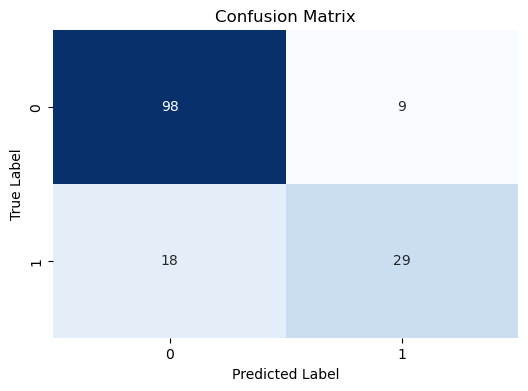

In [44]:
# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()